In [244]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [233]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_gedersub = pd.read_csv('gender_submission.csv')
df_test['Survived'] = df_gedersub['Survived']
df1 = [df_train,df_test]
data_frame = pd.concat(df1)

In [234]:
data_frame.columns
data_frame.shape
data_frame.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
398,1290,0,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S
399,1291,0,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q
400,1292,1,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
401,1293,0,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
402,1294,1,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
403,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
406,1298,0,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C


In [235]:
data_frame['Sex'] = np.where(data_frame['Sex'].values == 'male',1,0) 

In [236]:
data_frame['Embarked'] = np.where(data_frame['Embarked'].values == 'C',0,
                                (np.where( data_frame['Embarked'].values == 'Q',1, 2)))

In [237]:
data_frame = data_frame[['Pclass','Sex','Age','SibSp','Parch','Survived','Embarked','Fare']]
data_frame = data_frame.dropna()
target = data_frame['Survived']
features = data_frame[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]

In [238]:
target

0      0
1      1
2      1
3      1
4      0
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 1045, dtype: int64

In [239]:
features

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,3,1,22.0,1,0,2,7.2500
1,1,0,38.0,1,0,0,71.2833
2,3,0,26.0,0,0,2,7.9250
3,1,0,35.0,1,0,2,53.1000
4,3,1,35.0,0,0,2,8.0500
...,...,...,...,...,...,...,...
409,3,0,3.0,1,1,2,13.7750
411,1,0,37.0,1,0,1,90.0000
412,3,0,28.0,0,0,2,7.7750
414,1,0,39.0,0,0,0,108.9000


In [240]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=.33)

In [241]:
# GradiantBoostingClassifier is what I believed to be the best model for this kind of problem at the time (Given I only had about 5 days of experience) 
estimators = range(10, 500, 10)
total_accuracy = []
for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i).fit(x_train, y_train)
    boost_pred = boost.predict(x_test)

    total_accuracy.append(accuracy_score(y_test, boost_pred))

In [242]:
print(max(total_accuracy))

0.8724637681159421


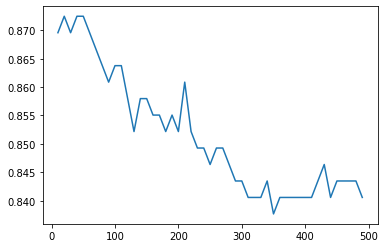

In [243]:
plt.plot(estimators,total_accuracy)
plt.show()